**BACKGROUND OF THE PROJECT**

I am walking with my friend, Maxwell to the library. When we got to the base of the stairs of the library, my friend brought up a game. I throw a die 100 times and the outcome determines my next step. If 1 or 2 appears, I move one step down the stairs. If 3, 4 or 5 appears, I go one step up the stairs. If I am fortunate and 6 appears, I throw again and walk up the outcome.
Logically, I can not walk down past 0 step. It is actually my first time climbing such a high stairs so I am a bit clumsy such that I have 0.1% chance of falling down the stairs. If I fall, I start again from the base with step 0.

I bet my friend I will reach 60 steps high.

**OBJECTIVE AND METHOD**

The objective is to determine the chance I have in reaching 60 steps high. We are going to employ Hacker's statistics to achieve this.

In [227]:
# Importing necessary modules
import numpy as np
import matplotlib.pyplot as plt

# setting a seed, step and rolling the dice
seed = np.random.seed(123)
step = 0
dice = np.random.randint(1, 7)

In [228]:
#determining my next move
#with the dice rolled,
if dice < 3:
    step = step - 1
elif dice < 6:
    step = step + 1
else:
    step = step + dice

**INTEGRATING CLUMSINESS: MY CHANCE OF FALLING DOWN**

Climbing the stairs to the 8th floor is something I have not done before so there is a possibility that I can fall down the stairs. This chance of falling down the stairs is .1% or 0.001. If I fall, I start again from the base with step 0. So, we are going to generate a random float between 0 and 1, the range for probability. If this value is less than or equal to 0.001, I should reset step to 0. We are going to update our random walk code to include this chance for every step taken.

In [229]:
if dice < 3:
    step = step - 1
elif dice < 6:
    step = step + 1
else:
    step = step + dice
if np.random.rand() <= 0.001: # clumsiness condition
    step = 0

Now, we're going to throw the dice 100 times and generate a single random walk.

In [230]:
random_walk = [0] # the random walk starts with the first step, 0.
for i in range (100):
    step = random_walk[-1] # current step is equal to last element in random_walk
    dice = np.random.randint(1, 7)
    if dice < 3:
        step = max(0, step - 1) # Ensuring step don't go below 0. max() returns the biggest among the two. so                                     whenever step - 1 is negative, 0 is returned.
    elif dice < 6:
        step = step + 1
    else:
        step = step + np.random.randint(1, 7)
    if np.random.rand() <= 0.001: # clumsiness condition
        step = 0
    
    random_walk.append(step)
print (random_walk)

[0, 1, 0, 1, 0, 0, 0, 1, 2, 3, 4, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 15, 17, 16, 17, 18, 17, 18, 19, 21, 22, 23, 22, 23, 24, 23, 24, 25, 26, 30, 32, 34, 39, 40, 41, 40, 41, 42, 41, 40, 41, 47, 46, 45, 46, 47, 52, 51, 50, 49, 51, 52, 54, 55, 54, 55, 56, 57, 58, 57, 58, 62, 61, 62, 61, 60, 59, 58, 59, 60, 61, 62, 64, 65, 64, 63, 64, 65, 66, 68, 69, 68, 69, 70, 69, 70]


**VISUALIZING THE WALK**
Here comes the work of matplotlib.pyplot that was imported earlier. We are going to visualize the walk graphically, to make decisions.

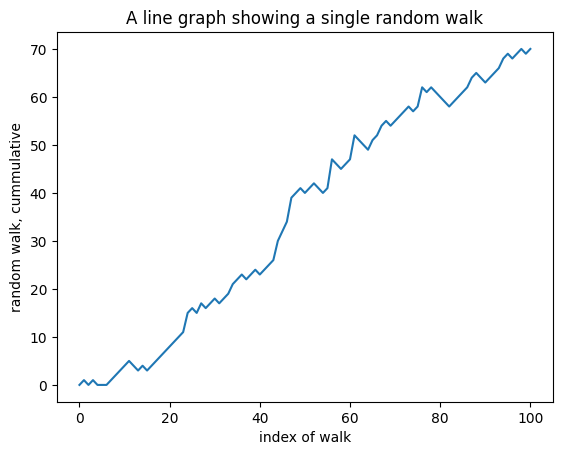

In [231]:
plt.plot(random_walk) # a line plot.
plt.xlabel("index of walk")
plt.ylabel("random walk, cummulative")
plt.title("A line graph showing a single random walk")
plt.show()

**SIMULATING MULTIPLE WALKS**
We are going to throw the dice a number of 100 times! This will help us to simulate the multiple walks and predict my chance of walking 60 steps up.

In [232]:
# We assign these number of 100 times roll to all_walks
all_walks =  [] # we start all_walks with empty list because we have'nt started a walk yet.
for walk in range (10): # we are simulating the random_walk 10 times.
    random_walk = [0] # the random walk starts with the first step, 0.
    for i in range (100): # Now, we put the entire 100 dice rolling code in the bigger "for loop"
        step = random_walk[-1] # current step is equal to last element in random_walk
        dice = np.random.randint(1, 7)
        if dice < 3:
            step = max(0, step - 1) # Ensuring step don't go below 0. max() returns the biggest among the two.                                       so whenever step - 1 is negative, 0 is returned.
        elif dice < 6:
            step = step + 1
        else:
            step = step + np.random.randint(1, 7)
        if np.random.rand() <= 0.001: # clumsiness condition
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)
print (all_walks)

[[0, 5, 4, 3, 4, 5, 6, 7, 8, 9, 8, 14, 13, 14, 18, 22, 24, 26, 29, 30, 29, 30, 31, 32, 31, 32, 38, 37, 38, 39, 41, 40, 41, 47, 48, 49, 50, 49, 48, 49, 50, 49, 53, 52, 53, 54, 55, 59, 60, 59, 61, 60, 59, 60, 59, 58, 59, 64, 63, 62, 66, 69, 70, 72, 73, 72, 71, 72, 73, 72, 71, 76, 77, 78, 77, 76, 77, 78, 84, 85, 86, 87, 88, 87, 86, 87, 88, 87, 86, 87, 88, 87, 88, 89, 90, 89, 90, 91, 90, 93, 94], [0, 0, 1, 2, 4, 3, 2, 3, 7, 8, 9, 12, 13, 14, 13, 12, 18, 19, 18, 17, 18, 19, 18, 19, 24, 25, 31, 37, 39, 40, 46, 45, 46, 45, 46, 48, 49, 48, 49, 53, 52, 51, 52, 53, 54, 53, 52, 53, 52, 51, 52, 51, 52, 53, 52, 53, 54, 55, 56, 55, 54, 55, 58, 59, 60, 64, 65, 64, 65, 64, 63, 64, 65, 64, 68, 70, 71, 72, 73, 72, 73, 74, 75, 76, 75, 76, 75, 76, 75, 74, 75, 76, 77, 79, 78, 81, 82, 81, 80, 81, 82], [0, 1, 0, 1, 0, 1, 0, 1, 3, 2, 8, 7, 8, 7, 6, 7, 11, 12, 11, 12, 13, 14, 15, 14, 13, 14, 15, 19, 20, 19, 24, 23, 24, 23, 22, 23, 24, 23, 22, 26, 27, 33, 34, 35, 36, 37, 36, 37, 39, 40, 41, 40, 41, 40, 41, 40, 

Text(0.5, 1.0, 'A line graph showing 10 times simulated random walks')

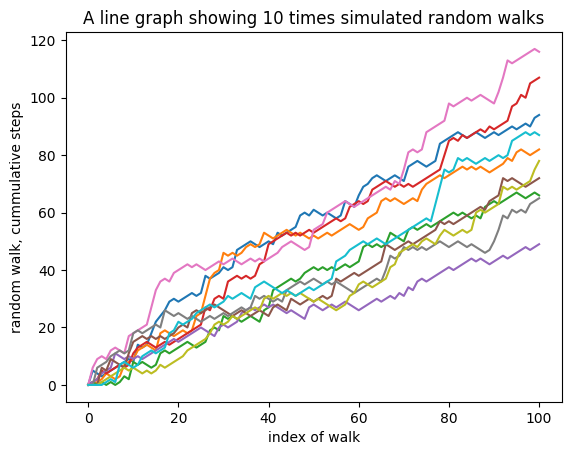

In [233]:
# Visualizing the 10 times simulations
np_all_walks = np.transpose(np.array(all_walks)) # converting and transposing to be able to plot each single one of the lits.
 #_________Use either this approach_________
np_all_walks_tp = np.transpose(np.array(all_walks))
plt.plot(np_all_walks_tp) # a line plot.plt.plot(random_walk) # a line plot.
plt.xlabel("index of walk")    
plt.ylabel("random walk, cummulative steps")
plt.title("A line graph showing 10 times simulated random walks")
#________________________Or this____________________
#for random_walk in all_walks:
    #plt.plot(random_walk)
    #plt.xlabel("index of walk")
    #plt.ylabel("random walk, cummulative steps")
    #plt.title("A line graph showing random walks")
#plt.show()


**GREATER SIMULATIONS**

If we had time and space, we would have increased the simulations gradually at a time to observe the changes in the distribution of random walks. However, to make sure that we have enough information to predict the chance of reaching 60 steps high, we are going to simulate our walk 1000 times!

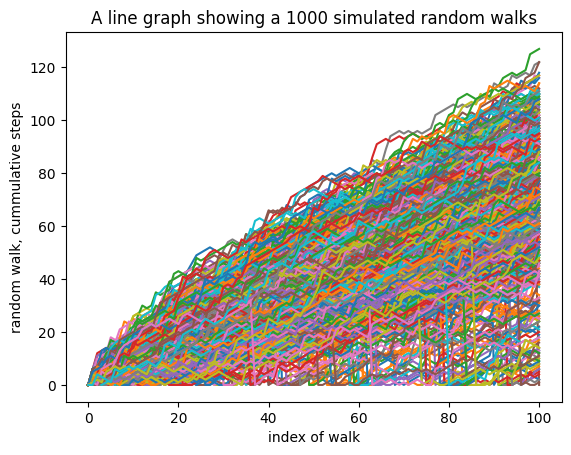

In [234]:
# simulating random_walk 1000 times and Visualizing
all_walks =  [] # we start all_walks with empty list because we have'nt started a walk yet.
for walk in range (1000): # we are simulating the random walk 1000 times
    random_walk = [0] # the random walk starts with the first step, 0.
    for i in range (100): # Now, we put the entire 100 dice rolling code in the bigger "for loop"
        step = random_walk[-1] # current step is equal to last element in random_walk
        dice = np.random.randint(1, 7)
        if dice < 3:
            step = max(0, step - 1) # Ensuring step don't go below 0. max() returns the biggest among the two.                                       so whenever step - 1 is negative, 0 is returned.
        elif dice < 6:
            step = step + 1
        else:
            step = step + np.random.randint(1, 7)
        if np.random.rand() <= 0.001: # clumsiness condition
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

np_all_walks_tp = np.transpose(np.array(all_walks))
plt.plot(np_all_walks_tp)
plt.xlabel("index of walk")
plt.ylabel("random walk, cummulative steps")
plt.title("A line graph showing a 1000 simulated random walks")
plt.show()

It looks clumsy right? Let's plot only the endpoints of all 1000 random walks we've simulated. We achieve this by selecting the last row of our transposed numpy array. Basically, we want to know about the end points of all the random walks we've simulated. These end points have a certain distribution that we can visualize with a histogram. Remember, the rows become the columns and the columns, the rows when we transpose our array or matrix and this makes the selection of the last row valid. We store the selection as end_points.

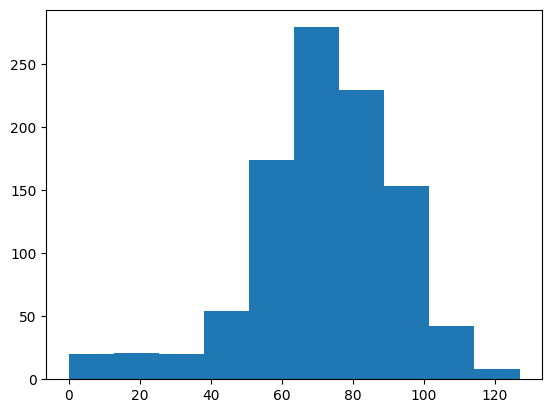

In [235]:
end_points = np_all_walks_tp[-1, :] # we seelect all of the last row
plt.hist(end_points)
plt.show()

**ANALYSIS AND CONCLUSION**
The histogram of above was created from a NumPy array end_points, that contains 1000 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, we can count the number of integers in end_points that are greater than or equal to 60 and divide that number by 1000, the total number of simulations. 

Well then, what's the estimated chance that you'll reach at least 60 steps high if you play this Empire State Building game? The end_points array is everything we need. Let's get on the calculation!

In [236]:
end_points = np_all_walks_tp[-1, :]
len(end_points[end_points >= 60]) # Total number of integers/elements in end_points, greater than 60.

787

In [237]:
len(end_points) # Total number of integers/elements in end_points

1000

In [238]:
# Prob. of reaching 60 steps high = (elements in end_points greater than 60)/(total elements in end_points)
Prob_60_steps = len(end_points[end_points >= 60]) / len(end_points)
Prob_60_steps

#NB: We could achieve same result by running: np.mean (end_points >= 60)

0.787

So, I have approximately 79% chance of reaching 60 steps high on the stirs. I will say that is a pretty good odds in my favor.